<a href="https://colab.research.google.com/github/ehsanshahini/g-c3n4_prediction/blob/main/g_C3N4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting ΔG_exf and ΔG_sol (SFE)


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from pylab import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Data.csv')
# optimal subset of features for predicting deltaG_exf
dataset = dataset[['Heat of vaporization','Dielectric constant', 'Surface tension', 'Density', 'MW', 'deltaG(exf)', 'Solvent_number']]
# optimal subset of features for predicting deltaG_sol 
#dataset = dataset[['Dielectric constant', 'Surface tension', 'Thermal expansion', 'MW', 'PAC mean heavy atoms', 'PAC max', 'deltaG(sol)', 'Solvent_number']]
X = dataset.iloc[:, :-2]
y = dataset.iloc[:, -2].values 

##Machine learning models

###Splitting the dataset into the Training set and Test set





In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)

###Function that runs the requested algorithm and returns the accuracy metrics

In [ ]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_test, y_test) * 100, 2)
    
    # Cross Validation 
    y_pred = cross_val_predict(algo,
                               X,
                               y,
                               cv=cv,
                               n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.r2_score(y, y_pred) * 100, 2)
    rmse = mean_squared_error(y_pred, y, squared=False)
    return y_pred, acc, acc_cv, rmse

###Extra Trees Regressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
y_pred, acc_log, acc_cv_log, rmse = fit_ml_algo(ExtraTreesRegressor(n_estimators=100), 
                                                               X_train, 
                                                               y_train, 10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
rmse = np.format_float_positional(rmse, precision=4, unique=False, fractional=False, trim='k')
print("RMSE = %s" % rmse)

Accuracy: 42.28
Accuracy CV 10-Fold: 80.0
RMSE = 3.908


NameError: ignored

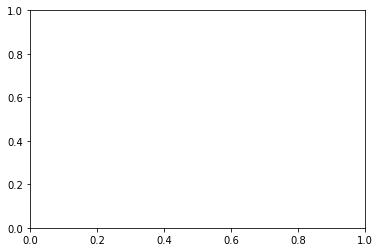

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel(r'$Measured \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_ylabel(r'$Predicted \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_title('ETR')
#ax.text(min(y)-1,max(y)-3, r'$R^2 = %s$' %acc_cv_log, style='italic')
#ax.text(min(y)-1,max(y)-5, r'$RMSE = %s (kJ/mol.nm^2)$' % rmse, style='italic')
ax.text(min(y)-1,max(y)-3, r'$R^2 = 82.22$' , style='italic')
ax.text(min(y)-1,max(y)-5, r'$RMSE = 14.74 (kJ/mol.nm^2)$' , style='italic')
plt.show()

In [ ]:
from numpy import savetxt
savetxt('res.csv', (np.c_[y, y_pred]), delimiter=',')

###Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
y_pred, acc_log, acc_cv_log, rmse = fit_ml_algo(RandomForestRegressor(), 
                                                               X_train, 
                                                               y_train, 10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
rmse = np.format_float_positional(rmse, precision=4, unique=False, fractional=False, trim='k')
print("RMSE = %s" % rmse)

Accuracy: 75.79
Accuracy CV 10-Fold: 79.51
RMSE = 8.861


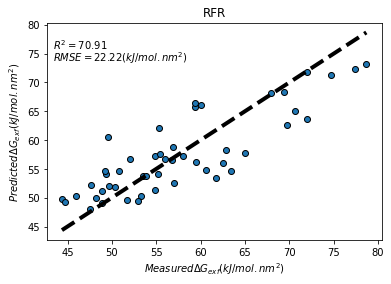

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel(r'$Measured \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_ylabel(r'$Predicted \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_title('RFR')
ax.text(min(y)-1,max(y)-3, r'$R^2 = %s$' %acc_cv_log, style='italic')
ax.text(min(y)-1,max(y)-5, r'$RMSE = %s (kJ/mol.nm^2)$' % rmse, style='italic')
plt.show()

###Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
y_pred, acc_log, acc_cv_log, rmse = fit_ml_algo(GradientBoostingRegressor(), 
                                                               X_train, 
                                                               y_train, 10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
rmse = np.format_float_positional(rmse, precision=4, unique=False, fractional=False, trim='k')
print("RMSE = %s" % rmse)

Accuracy: 75.7
Accuracy CV 10-Fold: 77.71
RMSE = 9.241


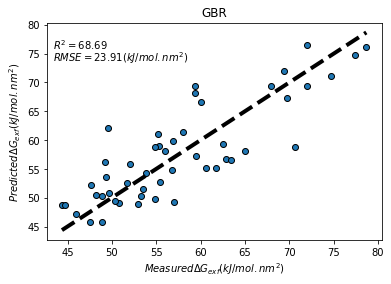

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel(r'$Measured \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_ylabel(r'$Predicted \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_title('GBR')
ax.text(min(y)-1,max(y)-3, r'$R^2 = %s$' %acc_cv_log, style='italic')
ax.text(min(y)-1,max(y)-5, r'$RMSE = %s (kJ/mol.nm^2)$' % rmse, style='italic')
plt.show()

### AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
y_pred, acc_log, acc_cv_log, rmse = fit_ml_algo(AdaBoostRegressor(n_estimators=100), 
                                                               X_train, 
                                                               y_train, 10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
rmse = np.format_float_positional(rmse, precision=4, unique=False, fractional=False, trim='k')
print("RMSE = %s" % rmse)

Accuracy: 80.01
Accuracy CV 10-Fold: 76.69
RMSE = 9.450


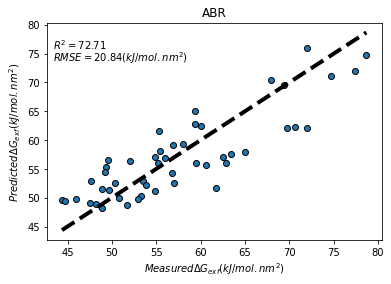

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel(r'$Measured \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_ylabel(r'$Predicted \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_title('ABR')
ax.text(min(y)-1,max(y)-3, r'$R^2 = %s$' %acc_cv_log, style='italic')
ax.text(min(y)-1,max(y)-5, r'$RMSE = %s (kJ/mol.nm^2)$' % rmse, style='italic')
plt.show()

### Bayesian ridge

In [ ]:
from sklearn.linear_model import BayesianRidge
y_pred, acc_log, acc_cv_log, rmse = fit_ml_algo(BayesianRidge(),
                                          X_train,
                                          y_train, 10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
rmse = np.format_float_positional(rmse, precision=4, unique=False, fractional=False, trim='k')
print("RMSE = %s" % rmse)

Accuracy: 29.77
Accuracy CV 10-Fold: 10.98
RMSE = 18.47


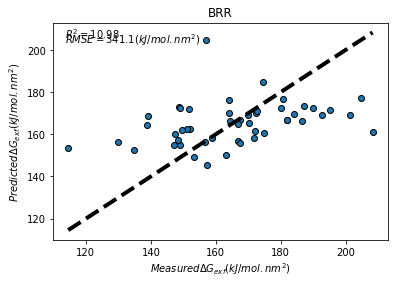

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel(r'$Measured \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_ylabel(r'$Predicted \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_title('BRR')
ax.text(min(y)-1,max(y)-3, r'$R^2 = %s$' %acc_cv_log, style='italic')
ax.text(min(y)-1,max(y)-5, r'$RMSE = %s (kJ/mol.nm^2)$' % rmse, style='italic')
plt.show()

In [ ]:
from numpy import savetxt
savetxt('res.csv', (np.c_[y, y_pred]), delimiter=',')

###Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
y_pred, acc_log, acc_cv_log, rmse = fit_ml_algo(LinearRegression(), 
                                                               X_train, 
                                                               y_train, 5)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
rmse = np.format_float_positional(rmse, precision=4, unique=False, fractional=False, trim='k')
print("RMSE = %s" % rmse)

Accuracy: 67.85
Accuracy CV 10-Fold: 56.18
RMSE = 12.96


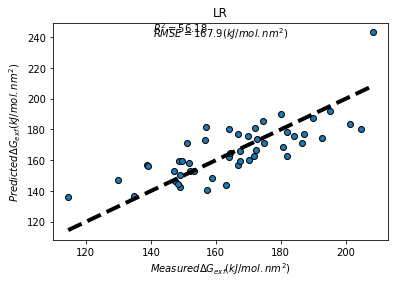

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel(r'$Measured \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_ylabel(r'$Predicted \Delta G_{exf} (kJ/mol.nm^2)$')
ax.set_title('LR')
ax.text(min(y_pred)+5 ,max(y_pred), r'$R^2 = %s$' %acc_cv_log, style='italic')
ax.text(min(y_pred)+5 ,max(y_pred)-3, r'$RMSE = %s (kJ/mol.nm^2)$' % rmse, style='italic')
plt.show()

In [ ]:
from numpy import savetxt
savetxt('res.csv', (np.c_[y, y_pred]), delimiter=',')

In [ ]:
regressor = LinearRegression()
regressor = LinearRegression()
regressor.fit(X, y)
print(regressor.coef_)
print(regressor.intercept_)

[-8.25935634e-02  2.10109959e-01 -2.01286072e+01  3.96852907e-04
  2.05927347e+01  2.78014920e+01]
168.17700793866908


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
regressor = RandomForestRegressor(n_estimators = 200,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 10)
regressor.fit(X, y)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(regressor.score(X_train, y_train), 
                                                                                             regressor.oob_score_,
                                                                                             regressor.score(X_test, y_test)))

cv = cross_validate(regressor, X, y, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

R^2 Training Score: 0.96 
OOB Score: 0.65 
R^2 Validation Score: 0.84
[0.42521971 0.64000138 0.60223064 0.25172546 0.35429379]
0.45469419644152875


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor(random_state=0)
regressor.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(regressor.score(X_train, y_train),
                                                                                             regressor.score(X_test, y_test)))

cv = cross_validate(regressor, X, y, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

R^2 Training Score: 1.00 
R^2 Validation Score: 0.43
[0.49378458 0.62472318 0.7805967  0.42069782 0.40887145]
0.5457347452440708


## Using experimental values for 49 solvents


In [ ]:
Solvents_num = [1, 3, 4, 6, 8, 10, 11, 23, 24, 27, 30, 32, 33, 35, 36, 37, 39, 40, 42, 45, 46, 50, 53, 58, 62, 64, 71, 80, 96, 97, 103, 106, 107, 114, 115, 118, 120, 124, 135, 138, 141, 144, 146]
CB = [40.97, 5.6, 33.0, 1110, 112.55] # in a respect matter: 'Heat of vaporization','Dielectric c onstant', 'Surface tension', 'Density', 'MW'
CHP = [39.61, 7.8, 40.67, 1007, 167.25]
DCB = [49, 2.4, 31.4, 1250, 147]
IPA = [45.39, 17.9, 22.11, 785, 60.1]
NMP = [53.4,33, 40.7, 1033, 99.13]
NVP = [55.2, 13.41, 42.3, 1040, 111.14]
data_exp_whole = pd.read_csv('dataset_merged.csv')


In [ ]:
# creating the experimental values for the X matrix for solvents that are in the dataset_mereged (Caleman)
X_exp_49_temp = []
for num in Solvents_num:
  vap_heat = data_exp_whole.loc[num-1, 'vap_exp']
  epsilon = data_exp_whole.loc[num-1, 'eps_exp']
  st = data_exp_whole.loc[num-1, 'st_exp']
  Density = data_exp_whole.loc[num-1, 'den_exp']
  MW = data_exp_whole.loc[num-1, 'MW']
  temp = [vap_heat, epsilon, st, Density, MW]
  X_exp_49_temp.append(temp)

X_exp_49_temp.append(CB); X_exp_49_temp.append(CHP); X_exp_49_temp.append(DCB); X_exp_49_temp.append(IPA); X_exp_49_temp.append(NMP); X_exp_49_temp.append(NVP)

X_exp_49 = pd.DataFrame(X_exp_49_temp)
X_exp_49.columns = X.columns

### Using experimental values for all 146 solvents


In [ ]:
data_exp_whole = pd.read_csv('dataset_merged.csv')

In [ ]:
# creating the experimental values for the X matrix for solvents that are in the dataset_mereged (Caleman et al.)
X_exp_temp = []
for num in range(146):
  vap_heat = data_exp_whole.loc[num, 'vap_exp']
  epsilon = data_exp_whole.loc[num, 'eps_exp']
  st = data_exp_whole.loc[num, 'st_exp']
  Density = data_exp_whole.loc[num, 'den_exp']
  MW = data_exp_whole.loc[num, 'MW']
  temp = [vap_heat, epsilon, st, Density, MW]
  X_exp_temp.append(temp)

X_exp_temp.append(CB); X_exp_temp.append(CHP); X_exp_temp.append(DCB); X_exp_temp.append(IPA); X_exp_temp.append(NMP); X_exp_temp.append(NVP) #solvents 147 to 152

X_exp = pd.DataFrame(X_exp_temp)
X_exp.columns = X.columns

In [ ]:
data_save = pd.DataFrame(X_exp)
data_save.to_csv("whole.csv", index=False, header=False)

## Subset selection

In [ ]:
import itertools
import time
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
plt.style.use('ggplot')

In [ ]:
def fit_ml_model(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_test, y_test), 2)
    
    # Cross Validation 
    y_pred = model_selection.cross_val_predict(algo, 
                                                  X, 
                                                  y, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.r2_score(y, y_pred), 2)
    RSS = mean_squared_error(y, y_pred) * len(y)
    return y_pred, acc, acc_cv, RSS

In [ ]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
#k = 4
RSS_list, R_squared_list, feature_list = [], [], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X_train.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X_train.columns,k):
        tmp_result = fit_ml_model(RandomForestRegressor(), X_train, y_train, 10)   #Store temp result 
        RSS_list.append(tmp_result[3])                  #Append lists
        R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # Remove the CWD from sys.path while we load stuff.


Loop...:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
4,1,110685.574601,0.62,"(Dielectric constant,)"
16,2,112168.243632,0.61,"(Density, Heat Capacity (Cp))"
76,3,105781.688049,0.63,"(Heat of Vaporization, Dielectric constant, Su..."


,numb_features,RSS,R_squared,features
4,1,110685.574601,0.62,"(Dielectric constant,)"
16,2,112168.243632,0.61,"(Density, Heat Capacity (Cp))"
26,2,113625.690448,0.61,"(Heat Capacity (Cp), Dielectric constant)"


In [ ]:
import time
import statsmodels.api as sm

##Learning curve

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt


# Create a pipeline; This will be passed as an estimator to learning curve method
#
pipeline = make_pipeline(StandardScaler(),
                        ExtraTreesRegressor())
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X, y=y, cv=10, train_sizes=np.linspace(0.01, 1.0, 50), n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel(r'$R^2 score$')
plt.grid()
plt.legend(loc='lower right')
plt.show()

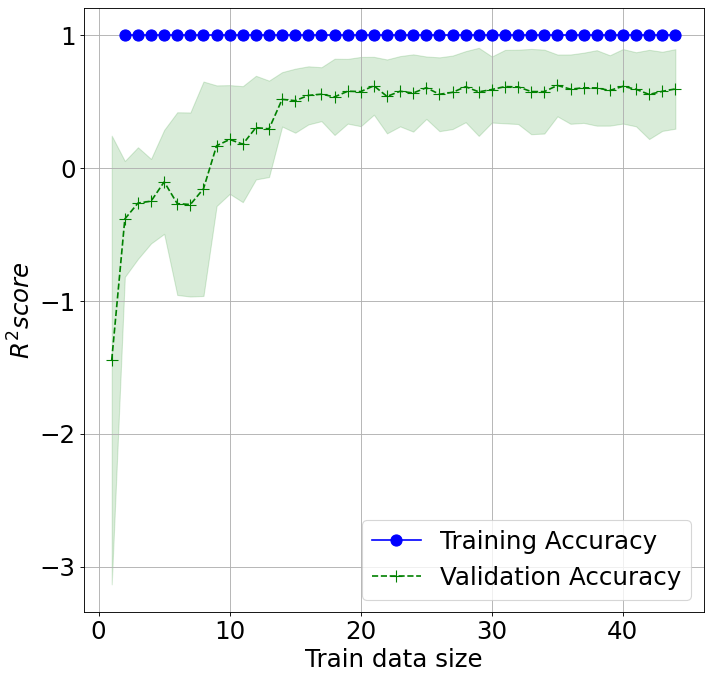

In [ ]:
from matplotlib.pyplot import figure
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
figure(figsize=(10, 10), dpi=80)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=10, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=10, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Train data size')
plt.ylabel(r'$R^2 score$')
plt.grid()
plt.legend(loc='lower right')
plt.show()